# <font color = "red">Project 2

## <font color = "blue"> Blue color is comment, <font color = 'Green'> Green color is conclusion

# Regression Part (Used cars database)

## Introduction

Over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen. The content of the data is in german, so one has to translate it first if one can not speak german.

## Data discription

dateCrawled : when this ad was first crawled, all field-values are taken from this date

name : "name" of the car

seller : private or dealer

offerType

price : the price on the ad to sell the car

abtest

vehicleType

yearOfRegistration : at which year the car was first registered

gearbox

powerPS : power of the car in PS

model

kilometer : how many kilometers the car has driven

monthOfRegistration : at which month the car was first registered

fuelType

brand

notRepairedDamage : if the car has a damage which is not repaired yet

dateCreated : the date for which the ad at ebay was created

nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )

postalCode

lastSeenOnline : when the crawler saw this ad last online

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd 
from sklearn import model_selection # for splitting the data into training and testing data
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import os
os.chdir("C:/Users/howar/Desktop/ML")

### <font color='blue'> Import database

In [2]:
df=pd.read_csv("autos.csv",encoding = "ISO-8859-1")

In [3]:
df = pd.DataFrame(data=df)

In [4]:
print(df.shape)

(371528, 20)


### <font color='blue'> Basic understanding of numerical features

In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


### <font color='blue'> Basic understanding of categorical features

In [6]:
df.describe(include = 'O')

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371528,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468,371528,371528
unique,280500,233531,2,2,2,8,2,251,7,40,2,114,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:45:59
freq,7,657,371525,371516,192585,95894,274214,30070,223857,79640,263182,14450,17


### <font color='blue'> There are 5 columns and lots of missing values

In [7]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

# Dropping unnecessary feature

# Star from categorical variables

## Look at seller variable

In [8]:
df["seller"].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

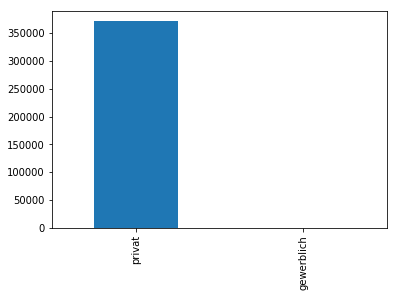

In [9]:
df['seller'].value_counts().plot.bar()

### <font color='blue'> one of the label only have 3 entries, so we drop it

In [10]:
df.drop(['seller'], axis=1,inplace=True)

## Look at the offerType variable

In [11]:
df["offerType"].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

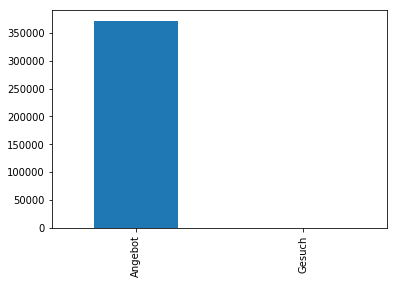

In [12]:
df['offerType'].value_counts().plot.bar()

### <font color='blue'> one of the label only have 12 entries, so we drop it

In [13]:
df.drop(['offerType'], axis=1,inplace=True)

## Look at the nrOfPictures variable

In [14]:
df["nrOfPictures"].value_counts()

0    371528
Name: nrOfPictures, dtype: int64

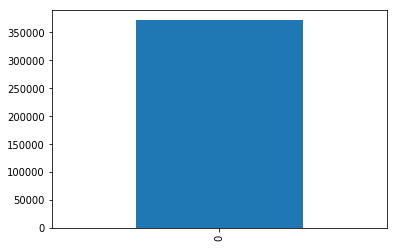

In [15]:
df['nrOfPictures'].value_counts().plot.bar()

### <font color='blue'> It only have one label, so we drop it

In [16]:
df.drop(['nrOfPictures'], axis=1,inplace=True)

## Look at the abtest variable

In [17]:
df["abtest"].value_counts()
# keep it

test       192585
control    178943
Name: abtest, dtype: int64

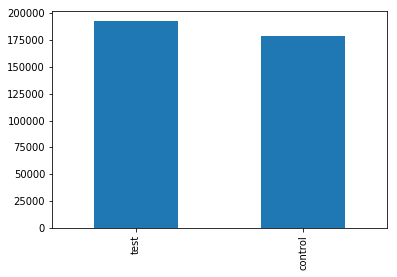

In [18]:
df['abtest'].value_counts().plot.bar()

### <font color='blue'> Both labels are quite even, so we keep it

## Look at the dateCrawled, dateCreated, lastSeen variable

In [19]:
df[ ["dateCrawled","dateCreated","lastSeen"] ].head()

,dateCrawled,dateCreated,lastSeen
0,2016-03-24 11:52:17,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31 00:00:00,2016-04-06 10:17:21


### <font color='blue'> These three variable are just dates, we don't need dates for our regressions

In [20]:
df = df.drop(["dateCrawled","dateCreated","lastSeen"] , axis=1 )

## Look at the postalCode variable

In [21]:
df["postalCode"].head()

0    70435
1    66954
2    90480
3    91074
4    60437
Name: postalCode, dtype: int64

### <font color='blue'> We don't need postcode for our regressions

In [22]:
df.drop(['postalCode'], axis=1,inplace=True)

## Look at the name variable

In [23]:
df["name"].value_counts().head()

Ford_Fiesta            657
BMW_318i               627
Opel_Corsa             622
Volkswagen_Golf_1.4    603
BMW_316i               523
Name: name, dtype: int64

### <font color='blue'> It's the nome of the cars, we don't need it, so we drop it

In [24]:
df.drop(['name'], axis=1,inplace=True)

# Deal with missing value

In [25]:
df.isnull().sum()
# 5 variable contain missing value

price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

### Filling missing value for gearbox variable

In [26]:
df.groupby("brand")["gearbox"].value_counts()

brand           gearbox  
alfa_romeo      manuell       2064
                automatik      146
audi            manuell      20841
                automatik    10698
bmw             manuell      25323
                automatik    13442
chevrolet       manuell       1104
                automatik      634
chrysler        automatik      753
                manuell        637
citroen         manuell       4304
                automatik      604
dacia           manuell        877
                automatik        1
daewoo          manuell        475
                automatik       33
daihatsu        manuell        667
                automatik       85
fiat            manuell       8786
                automatik      231
ford            manuell      22198
                automatik     1953
honda           manuell       2393
                automatik      318
hyundai         manuell       3091
                automatik      421
jaguar          automatik      477
                manuell      

In [27]:
gearbox = df["gearbox"].unique()
brand = df["brand"].unique()
d = {}

for i in brand :
    m = 0
    for j in gearbox :
        if df[(df.gearbox == j) & (df.brand == i)].shape[0] > m :
            m = df[(df.gearbox == j) & (df.brand == i)].shape[0]
            d[i] = j

In [28]:
for i in brand :
    df.loc[(df.brand == i) & (df.gearbox.isnull()) ,"gearbox" ] = d[i]

In [29]:
df["gearbox"].isnull().sum()

0

### <font color='blue'> use most frequent label to fill Na

### Filling missing value for notRepairedDamage variable

In [30]:
df["notRepairedDamage"].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [31]:
df["notRepairedDamage"].fillna("nein",inplace = True)

### Filling missing value for fuelType variable

In [32]:
df["fuelType"].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [33]:
df["fuelType"].fillna("benzin",inplace = True)

In [34]:
df["fuelType"].isnull().sum()

0

### <font color='blue'>use fuelType to fill out missing vehicltype (same fueltype more likely to have same vehicle type)

### Filling missing value for vehicleType variable

In [35]:
df["vehicleType"].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [36]:
df.groupby("fuelType")["vehicleType"].value_counts()

fuelType  vehicleType
andere    limousine         51
          andere            44
          kleinwagen        29
          kombi             25
          bus               10
          suv                9
          cabrio             6
          coupe              3
benzin    kleinwagen     72531
          limousine      66300
          kombi          31350
          cabrio         20769
          coupe          15935
          bus            10795
          suv             5400
          andere          1786
cng       bus              240
          kombi            136
          kleinwagen        80
          limousine         40
          andere            14
          suv                4
          cabrio             3
          coupe              3
diesel    kombi          34848
          limousine      27648
          bus            18622
          suv             8665
          kleinwagen      6808
          coupe           2737
          cabrio          1871
          andere 

In [37]:
vehicleType = df["vehicleType"].unique()
fuelType = df["fuelType"].unique()
print(fuelType)
print(vehicleType)
 
vehicleType = np.delete(vehicleType,0)

['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']


In [38]:
d = {}
for i in fuelType :
    m = 0
    for j in vehicleType :
        if df[(df.vehicleType == j) & (df.fuelType == i)].shape[0] > m :
            m = df[(df.vehicleType == j) & (df.fuelType == i)].shape[0]
            d[i] = j

In [39]:
for i in fuelType :
    df.loc[(df.fuelType == i) & (df.vehicleType.isnull()) ,"vehicleType" ] = d[i]

In [40]:
df["vehicleType"].isnull().sum()

0

### drop model
We already have the brand feature, these 2 variable are highly correlate so we droped it

In [41]:
df.drop(['model'], axis=1,inplace=True)

## remove outlier

In [42]:
df["yearOfRegistration"].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [43]:
df[df.yearOfRegistration > 2017].shape

(4134, 11)

In [44]:
df[df.yearOfRegistration < 1950].shape

(289, 11)

### <font color='blue'> So only 289 registration are there before 1950 and 4000 registration after 2017 , so these are outliers and should be removed for better results

In [45]:
df = df[(df.yearOfRegistration < 2017)  & (df.yearOfRegistration > 1950)]

In [46]:
# now lets look at the price
df["price"].describe()

count    3.565370e+05
mean     1.739899e+04
std      3.658497e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.999000e+03
75%      7.400000e+03
max      2.147484e+09
Name: price, dtype: float64

### <font color='blue'> price starts from 0 and goes upto max 2.147484e+09 , but the price 0 is unrealistic, so we drop those rows. Only 158 values are there above 2 lakh and 12000 enries below 100, lets remove them

In [47]:
df[df.price < 100].shape

(12372, 11)

In [48]:
df[df.price > 200000].shape
#only 158 values are there above 2 lakh and 12000 enries below 100, lets remove them

(158, 11)

In [49]:
df = df[(df.price > 100) & (df.price < 200000) ]

In [50]:
df.shape

(342990, 11)

## Data transformation

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
data = df.copy()

In [53]:
data["vehicleType"] =LabelEncoder().fit_transform(data["vehicleType"])
data["fuelType"] =LabelEncoder().fit_transform(data["fuelType"])
data["gearbox"] =LabelEncoder().fit_transform(data["gearbox"])
data["notRepairedDamage"] =LabelEncoder().fit_transform(data["notRepairedDamage"])
data["brand"] =LabelEncoder().fit_transform(data["brand"])
data["abtest"] =LabelEncoder().fit_transform(data["abtest"])

## Train Test Split

In [54]:
np.random.seed(123)
y  = data["price"]
x =  data.drop("price",axis=1)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

## Small set, for some model that too time consumming

In [57]:
np.random.seed(123)
y  = data["price"]
x =  data.drop("price",axis=1)

_, sample_X, _, sample_y = train_test_split(x, y, shuffle = False, test_size = 0.01)
print(sample_X.shape,sample_y.shape)

small_x_train, small_x_test, small_y_train, small_y_test=train_test_split(sample_X, sample_y, test_size=0.25, random_state=0)

(3430, 10) (3430,)


In [58]:
print(small_x_train.shape)
print(small_y_train.shape)

print(small_x_test.shape)
print(small_y_test.shape)

(2572, 10)
(2572,)
(858, 10)
(858,)


## Bagging RF

In [66]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

lr_clf = RandomForestRegressor(n_estimators=100)
bag_clf = BaggingRegressor(lr_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(small_x_train, small_y_train)
y_pred = bag_clf.predict(small_x_test)
print('Train score: {:.4f}'.format(bag_clf.score(small_x_train, small_y_train)))
print('Test score: {:.4f}'.format(bag_clf.score(small_x_test, small_y_test)))

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      oob_score=False,
                                    

Train score: 0.6058
Test score: 0.5827


## Bagging KNN regression

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(7)
bag_reg = BaggingRegressor(knn_reg, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_reg.fit(small_x_train, small_y_train)
y_pred = bag_reg.predict(small_x_test)
print('Train score: {:.4f}'.format(bag_reg.score(small_x_train, small_y_train)))
print('Test score: {:.4f}'.format(bag_reg.score(small_x_test, small_y_test)))

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=7,
                                                    p=2, weights='uniform'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=None, oob_score=True,
                 random_state=0, verbose=0, warm_start=False)

Train score: 0.3214
Test score: 0.2675


## Pasting RF

In [209]:
#bootsrap = false

from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

lr_clf = RandomForestRegressor(n_estimators=100)
bag_clf = BaggingRegressor(lr_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
print('Train score: {:.4f}'.format(bag_clf.score(x_train, y_train)))
print('Test score: {:.4f}'.format(bag_clf.score(x_test, y_test)))

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      oob_score=False,
                                    

Train score: 0.5756
Test score: 0.5516


## Pasting KNN regression

In [210]:
#bootsrap = false

knn_reg = KNeighborsRegressor(7)
bag_reg = BaggingRegressor(knn_reg, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_reg.fit(x_train, y_train)
y_pred = bag_reg.predict(x_test)
print('Train score: {:.4f}'.format(bag_reg.score(x_train, y_train)))
print('Test score: {:.4f}'.format(bag_reg.score(x_test, y_test)))

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=7,
                                                    p=2, weights='uniform'),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=None,
                 oob_score=False, random_state=0, verbose=0, warm_start=False)

Train score: 0.3342
Test score: 0.3185


## Gradient Boosting

## Fixed n_estimators

In [217]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=1.0, random_state=42)
gbrt.fit(x_train, y_train)
print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy on training set: 0.7983
Accuracy on test set: 0.7521


In [218]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.5, random_state=42)
gbrt.fit(x_train, y_train)
print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.5, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy on training set: 0.7934
Accuracy on test set: 0.7548


In [219]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt.fit(x_train, y_train)
print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy on training set: 0.7513
Accuracy on test set: 0.7219


### <font color='blue'> learning rate = 0.5 has the best outcome

# Fixed Learning_rate

In [214]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(x_train, y_train)
print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy on training set: 0.5406
Accuracy on test set: 0.5212


In [215]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1.0, random_state=42)
gbrt.fit(x_train, y_train)
print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy on training set: 0.7785
Accuracy on test set: 0.7399


In [216]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=1.0, random_state=42)
gbrt.fit(x_train, y_train)
print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy on training set: 0.7983
Accuracy on test set: 0.7521


## <font color='blue'> 200 estimators has better result

## Adaboosting

In [68]:
# AdaBoost for KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
knn_reg = KNeighborsRegressor(7)
ada_knn_reg = AdaBoostRegressor(knn_reg, random_state=0)
ada_knn_reg.fit(small_x_train, small_y_train)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=7,
                                                     p=2, weights='uniform'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_state=0)

In [73]:
print("AdaBoost for KNN Regression:")
print('Accuracy score: {:.4f}'.format(ada_knn_reg.score(small_x_test, small_y_test)))

AdaBoost for KNN Regression:
Accuracy score: 0.3893


In [76]:
# AdaBoost for Linear Regression
lr_reg = LinearRegression()
ada_lr_reg = AdaBoostRegressor(lr_reg, random_state=0)
ada_lr_reg.fit(x_train, y_train)
y_pred = ada_lr_reg.predict(x_test)
print("AdaBoost for Linear Regression:")
print('Accuracy score: {:.4f}'.format(ada_lr_reg.score(x_test, y_test)))

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_state=0)

AdaBoost for Linear Regression:
Accuracy score: 0.1643


### <font color = 'blue'> Adaboost for KNN is better than Linear Regression

# PCA

In [65]:
score_table = pd.DataFrame([], columns = ['Model', 'Train_score','Test_score','PCA_test'])

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_train)
X_test_reduced = pca.transform(x_test)

print("Explained variance ratio:",np.sum(pca.explained_variance_ratio_))
print("X_reduced shape:",X_reduced.shape)
print("n_components:",pca.n_components_)

Explained variance ratio: 0.9999999999999997
X_reduced shape: (257242, 10)
n_components: 10


## PCA Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_reduced, y_train)
print('Train_PCA R-sq:',lreg.score(X_reduced, y_train))
print('Test_PCA R-sq',lreg.score(X_test_reduced, y_test))

temp=pd.DataFrame([["linear_reg_pca",lreg.score(X_reduced, y_train),lreg.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

lreg = LinearRegression()
lreg.fit(small_x_train, small_y_train)
print('Train R-sq:',lreg.score(small_x_train, small_y_train))
print('Test R-sq',lreg.score(small_x_test, small_y_test))

temp=pd.DataFrame([["linear_reg",lreg.score(small_x_train, small_y_train),lreg.score(small_x_test, small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train_PCA R-sq: 0.337577091941236
Test_PCA R-sq 0.31996406364790286


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train R-sq: 0.4727494840275216
Test R-sq 0.48777951083750537


## PCA Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [95]:
ridge_reg = Ridge(alpha=100, random_state=0)
ridge_reg.fit(X_reduced, y_train)
print('Train_PCA R-sq:',ridge_reg.score(X_reduced, y_train))
print('Test_PCA R-sq',ridge_reg.score(X_test_reduced, y_test))

temp=pd.DataFrame([["ridge_reg_pca",ridge_reg.score(X_reduced, y_train),ridge_reg.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

ridge_reg = Ridge(alpha=100, random_state=0)
ridge_reg.fit(small_x_train, small_y_train)
print('Train small score:',ridge_reg.score(small_x_train, small_y_train))
print('Test small score',ridge_reg.score(small_x_test, small_y_test))

temp=pd.DataFrame([["ridge_reg",ridge_reg.score(small_x_train, small_y_train),ridge_reg.score(small_x_test,small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Train_PCA R-sq: 0.3375770615750562
Test_PCA R-sq 0.31996353808267974


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

Train small score: 0.4714328568620486
Test small score 0.48825747638866557


## PCA KNN 

In [89]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X_reduced, y_train)
print('Train_PCA R-sq:',knn_reg.score(X_reduced, y_train))
print('Test_PCA R-sq',knn_reg.score(X_test_reduced, y_test))

knn_reg = KNeighborsRegressor(3)
knn_reg.fit(small_x_train, small_y_train)
print('Train R-sq:',knn_reg.score(small_x_train, small_y_train))
print('Test R-sq',knn_reg.score(small_x_test, small_y_test))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Train_PCA R-sq: 0.8728574106762056
Test_PCA R-sq 0.708875866682346


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Train R-sq: 0.7606403597185619
Test R-sq 0.474404947163662


In [96]:
temp=pd.DataFrame([["knn_reg_pca",knn_reg.score(X_reduced, y_train),knn_reg.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

temp=pd.DataFrame([["knn_reg",knn_reg.score(small_x_train, small_y_train),knn_reg.score(small_x_test,small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

In [97]:
score_table

,Model,Train_score,Test_score,PCA_test
0,linear_reg_pca,0.337577,0.319964,None
1,linear_reg_pca,0.337577,0.319964,None
2,linear_reg,0.472749,0.487780,None
3,ridge_reg_pca,0.337577,0.319964,None
4,ridge_reg,0.471433,0.488257,None
5,knn_reg_pca,-1.865627,-1.736097,None
6,knn_reg,0.760640,0.474405,None


## PCA Lasso

In [98]:
from sklearn.linear_model import Lasso

In [99]:
lasso_reg = Lasso(alpha=100, random_state=0)
lasso_reg.fit(X_reduced, y_train)
print('Train_PCA R-sq:',lasso_reg.score(X_reduced, y_train))
print('Test_PCA R-sq',lasso_reg.score(X_test_reduced, y_test))

temp=pd.DataFrame([["lasso_reg_pca",lasso_reg.score(X_reduced, y_train),lasso_reg.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

lasso_reg = Lasso(alpha=100, random_state=0)
lasso_reg.fit(small_x_train, small_y_train)
print('Train small score:',lasso_reg.score(small_x_train, small_y_train))
print('Test small score',lasso_reg.score(small_x_test, small_y_test))

temp=pd.DataFrame([["lasso_reg",lasso_reg.score(small_x_train, small_y_train),lasso_reg.score(small_x_test, small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

Train_PCA R-sq: 0.3363102009590776
Test_PCA R-sq 0.3184414858653406


Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

Train small score: 0.46899758861443797
Test small score 0.4869850618430981


In [100]:
score_table

,Model,Train_score,Test_score,PCA_test
0,linear_reg_pca,0.337577,0.319964,None
1,linear_reg_pca,0.337577,0.319964,None
2,linear_reg,0.472749,0.487780,None
3,ridge_reg_pca,0.337577,0.319964,None
4,ridge_reg,0.471433,0.488257,None
5,knn_reg_pca,-1.865627,-1.736097,None
6,knn_reg,0.760640,0.474405,None
7,lasso_reg_pca,0.336310,0.318441,None
8,lasso_reg,0.468998,0.486985,None


## PCA Polynomial Regression

In [104]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(1,3):

    poly = PolynomialFeatures(n)#put data into higher power
    X_train_poly = poly.fit_transform(small_x_train)
    X_test_poly = poly.transform(small_x_test)
    lreg.fit(X_train_poly, small_y_train)
    train_score_list.append(lreg.score(X_train_poly, small_y_train))
    test_score_list.append(lreg.score(X_test_poly, small_y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
pca=PCA(n_components=0.95)
X_train_poly_pca = pca.fit_transform(X_train_poly)
X_test_poly_pca = pca.transform(X_test_poly)

In [112]:
lreg=LinearRegression()
lreg.fit(X_train_poly_pca, small_y_train)
print('Train_PCA R-sq:',lreg.score(X_train_poly_pca, small_y_train))
print('Test_PCA R-sq',lreg.score(X_test_poly_pca, small_y_test))

temp=pd.DataFrame([["poly_reg_pca",lreg.score(X_train_poly_pca, small_y_train),lreg.score(X_test_poly_pca, small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

lreg.fit(X_train_poly, small_y_train)
print('Train small score:',lreg.score(X_train_poly, small_y_train))
print('Test small score',lreg.score(X_test_poly, small_y_test))

temp=pd.DataFrame([["poly_reg",lreg.score(X_train_poly, small_y_train),lreg.score(X_test_poly, small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train_PCA R-sq: 0.1851994176047138
Test_PCA R-sq 0.12280887964612175


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train small score: 0.6605715807989154
Test small score 0.6043668566810096


## PCA decision tree

In [115]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_reduced, y_train)
print('Train_PCA R-sq:',tree.score(X_reduced, y_train))
print('Test_PCA R-sq:',tree.score(X_test_reduced, y_test))

temp=pd.DataFrame([["tree_reg_pca",tree.score(X_reduced, y_train),tree.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

tree.fit(small_x_train, small_y_train)
print('Train R-sq:',tree.score(small_x_train, small_y_train))
print('Test R-sq:',tree.score(small_x_test, small_y_test))

temp=pd.DataFrame([["tree_reg",tree.score(small_x_train, small_y_train),tree.score(small_x_test, small_y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Train_PCA R-sq: 0.2994920506830555
Test_PCA R-sq: 0.28247429721312967


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Train R-sq: 0.4290532538282983
Test R-sq: 0.4012181632388758


## PCA different SVR

In [60]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

In [61]:
C = 0.1
L_svr = LinearSVR(C=C)
ksvr_L = SVR(kernel='linear', C=C)
ksvr_rbf = SVR(kernel='rbf', gamma=0.1, C=C)
ksvr_poly = SVR(kernel='poly', degree=2, C=C)

In [67]:
L_svr.fit(X_reduced,y_train)
ksvr_L.fit(X_reduced,y_train)
ksvr_rbf.fit(X_reduced,y_train)
ksvr_poly.fit(X_reduced,y_train)

print('Linear_SVR train_pca score: ',L_svr.score(X_reduced, y_train))
print('Linear_SVR test_pca score: ',L_svr.score(X_test_reduced, y_test))

temp=pd.DataFrame([["Linear_SVR_reg_pca",L_svr.score(X_reduced, y_train),L_svr.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

print('Kernel_SVR_Linear train_pca score: ',ksvr_L.score(X_reduced, y_train))
print('Kernel_SVR_Linear test_pca score: ',ksvr_L.score(X_test_reduced, y_test))

temp=pd.DataFrame([["Kernel_SVR_Linear",ksvr_L.score(X_reduced, y_train),ksvr_L.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

print('Kernel_SVR_rbf train_pca score: ',ksvr_rbf.score(X_reduced, y_train))
print('Kernel_SVR_rbf test_pca score: ',ksvr_rbf.score(X_test_reduced, y_test))

temp=pd.DataFrame([["Kernel_SVR_rbf",ksvr_rbf.score(X_reduced, y_train),ksvr_rbf.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

print('Kernel_SVR_poly train_pca score: ',ksvr_poly.score(X_reduced, y_train))
print('Kernel_SVR_poly test_pca score: ',ksvr_poly.score(X_test_reduced, y_test))

temp=pd.DataFrame([["Kernel_SVR_poly",ksvr_poly.score(X_reduced, y_train),ksvr_poly.score(X_test_reduced, y_test),None]], columns = ['Model', 'Train_score','Test_score','PCA_test'])
score_table=score_table.append(temp,ignore_index=True)

Linear_SVR train_pca score:  -0.28789072349731804
Linear_SVR test_pca score:  -0.22365166341876086
Kernel_SVR_Linear train_pca score:  0.149033140055724
Kernel_SVR_Linear test_pca score:  0.15455504227610872
Kernel_SVR_rbf train_pca score:  -0.10232968374411167
Kernel_SVR_rbf test_pca score:  -0.08223177975415075
Kernel_SVR_poly train_pca score:  -0.053624643633725544
Kernel_SVR_poly test_pca score:  -0.0015985232844144546


In [64]:
L_svr.fit(small_x_train,small_y_train)

C:\Users\howar\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [65]:
print('Linear_SVR train score: ',L_svr.score(small_x_train, small_y_train))
print('Linear_SVR test score: ',L_svr.score(small_x_test, small_y_test))

Linear_SVR train score:  0.33252618613284624
Linear_SVR test score:  0.4394771243221597


In [62]:
import numpy as np
np.random.seed(123)
y  = data["price"]
x =  data.drop("price",axis=1)
x = data[['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']]

_, sample_X, _, sample_y = train_test_split(x, y, shuffle = False, test_size = 0.01)
print(sample_X.shape,sample_y.shape)

svr_x_train, svr_x_test, svr_y_train, svr_y_test=train_test_split(sample_X, sample_y, test_size=0.25, random_state=0)

(3430, 5) (3430,)


In [63]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
svr_x_train = ss.fit_transform(svr_x_train)
svr_x_test = ss.transform(svr_x_test)

In [64]:
ksvr_L.fit(svr_x_train,svr_y_train)
print('Kernel_SVR_Linear train score: ',ksvr_L.score(svr_x_train, svr_y_train))
print('Kernel_SVR_Linear test score: ',ksvr_L.score(svr_x_test, svr_y_test))

Kernel_SVR_Linear train score:  -0.05151737781162269
Kernel_SVR_Linear test score:  -0.061975216137118316


In [65]:
ksvr_rbf.fit(svr_x_train,svr_y_train)
print('Kernel_SVR_rbf train score: ',ksvr_rbf.score(svr_x_train, svr_y_train))
print('Kernel_SVR_rbf test score: ',ksvr_rbf.score(svr_x_test, svr_y_test))

Kernel_SVR_rbf train score:  -0.1236715704010316
Kernel_SVR_rbf test score:  -0.13512308419220975


In [66]:
ksvr_poly.fit(svr_x_train,svr_y_train)
print('Kernel_SVR_poly train score: ',ksvr_poly.score(svr_x_train, svr_y_train))
print('Kernel_SVR_poly test score: ',ksvr_poly.score(svr_x_test, svr_y_test))

Kernel_SVR_poly train score:  -0.1131247805590474
Kernel_SVR_poly test score:  -0.12074931348726525


### <font color = 'blue'> 1. Linear SVR is still better than other SVR

### <font color = 'blue'> 2. KNN is the best model with or without PCA

### <font color = 'blue'> 3. PCA's outcome is not better than reducing rows 

## Deep Learning

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(123)

Using TensorFlow backend.


In [71]:
# step 1: build the model, container
model = Sequential()
model.add(Dense(100, input_dim = small_x_train.shape[1], activation='sigmoid')) #hidden
model.add(Dense(50, input_dim = 60, activation='relu')) #hidden
model.add(Dense(5, input_dim = 10, activation='relu')) #hidden
model.add(Dense(1)) #output

In [72]:
# step 2: compile the model, computational graph
model.compile(loss='mse' , optimizer='Adagrad' , metrics = ['MSE'])

In [73]:
# step 3: train the model
model.fit(small_x_train, small_y_train, batch_size= 5, epochs=50)

Train on 2572 samples
Epoch 1/50
2572/2572 [==============================] - 1s 287us/sample - loss: 86715605.8740 - MSE: 86715560.0000
Epoch 2/50
2572/2572 [==============================] - 1s 241us/sample - loss: 86676492.8162 - MSE: 86676528.0000
Epoch 3/50
2572/2572 [==============================] - 1s 225us/sample - loss: 86638892.2959 - MSE: 86638928.0000
Epoch 4/50
2572/2572 [==============================] - 1s 228us/sample - loss: 86599903.5091 - MSE: 86599872.0000
Epoch 5/50
2572/2572 [==============================] - 1s 227us/sample - loss: 86557396.1401 - MSE: 86557408.0000
Epoch 6/50
2572/2572 [==============================] - 1s 231us/sample - loss: 86511516.9020 - MSE: 86511528.0000
Epoch 7/50
2572/2572 [==============================] - 1s 242us/sample - loss: 86464503.1286 - MSE: 86464504.0000
Epoch 8/50
2572/2572 [==============================] - 1s 235us/sample - loss: 86416083.8425 - MSE: 86416088.0000
Epoch 9/50
2572/2572 [==============================] - 1s

In [74]:
# step 4: evalution
loss_and_metrics = model.evaluate(small_x_train, small_y_train)
train_r_sq=1-(loss_and_metrics[1]*len(small_y_train))/(sum((small_y_train-small_y_train.mean())*(small_y_train-small_y_train.mean())))

loss_and_metrics = model.evaluate(small_x_test, small_y_test)
test_r_sq=1-(loss_and_metrics[1]*len(small_y_test))/(sum((small_y_test-small_y_test.mean())*(small_y_test-small_y_test.mean())))
print("Test Loss", loss_and_metrics[0])
print("Test MSE", loss_and_metrics[1])

858/858 [==============================] - 0s 24us/sample - loss: 99326501.4452 - MSE: 99326512.0000
Test Loss 99326501.44522144
Test MSE 99326510.0


### <font color = 'blue'>Test Loss = 99326501.44522144, Test MSE = 99326510.0

# Conclusion
## <font color = 'green'>1. The comparison shows that PCA is not better than reducing rows, 
## <font color = 'green'>2. If we do bagging again on RF regressor, we will get worse outcome than just using RF regressor
## <font color = 'green'>3. Bagging, Pasing normally can improve outcome.
## <font color = 'green'>4. Adaboosting didn't improve the result very much